In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from py3langid.langid import LanguageIdentifier, MODEL_FILE
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

import warnings

# Suppress FutureWarning related to is_sparse
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
train = pd.read_csv('subtask1.csv').drop(columns='Unnamed: 0')

train.head()

,id,text,label
0,15442,Es un tribunal de suprema instanza que forma p...,generated
1,26409,Aixó de tindrer la platgeta tant prou era un p...,human
2,12777,Doug mcadam es un científico estadista estadou...,generated
3,63467,"El president de la generalitat, carles puigdem...",generated
4,41050,"Traídas de francia, tan estrafalarias que una ...",generated


In [6]:
train.loc[0, 'text']

'Es un tribunal de suprema instanza que forma part de la jurisdiccion española, i és el principal organe judicial de catalunya, nacionals i comarcals. constitucionalmente, és el tribunal especial d"exercic de la judiccia catalana, és el que interpreta i defini la llei espanyola, i anull·la la seva aplicació en qualsevol cas o circunstancia, mitjançant la reforma del sistema legal català. és, a més, el tribunal especial d"exercic de la judiccia nacional catalana, és el que interpreta i s"applique la lex catalana, i que de nova es defineix per la constitució espanyola. és també un tribunal de recursos de catalunya, a la qual té afegit l"exercici del seu mandat en el fet que, al desenvolupament dels règims de la central bank of spain i de l"agència tributària de catalunya, es van aplicar els recursos de catalunya en les seves tasques. així, és un organisme obert al reconeixement de l"autogovern de catalunya, i es considera com a un tribunal de recursos, fins que aprové la constitución esp

In [7]:
identifier = LanguageIdentifier.from_pickled_model(MODEL_FILE)
identifier.set_languages(['en', 'es', 'pt', 'gl', 'eu', 'ca'])

# English (en)
# Spanish (es)
# Portuguese (pt)
# Galician (gl)
# Basque (eu)
# Catalan (ca)

identifier.classify(train.loc[0, 'text'])

('ca', -4691.1987)

In [8]:
def detect_language(text):
    return identifier.classify(text)[0]

# Create the new column
train['detected_language'] = train['text'].apply(detect_language)

train

,id,text,label,detected_language
0,15442,Es un tribunal de suprema instanza que forma p...,generated,ca
1,26409,Aixó de tindrer la platgeta tant prou era un p...,human,ca
2,12777,Doug mcadam es un científico estadista estadou...,generated,es
3,63467,"El president de la generalitat, carles puigdem...",generated,ca
4,41050,"Traídas de francia, tan estrafalarias que una ...",generated,es
...,...,...,...,...
109658,76637,"Bere burua egokitzen saiatu zuen, aurreko mome...",generated,eu
109659,107183,"Benquerida compañeira e amiga, para nós é moi ...",human,gl
109660,144741,"The irish president has signed the ""long-await...",generated,en
109661,1202,"Pedro de alvarado y contreras ""tonatiuh"" (bada...",human,es


In [9]:
train['label'].value_counts()

label
generated    58754
human        50909
Name: count, dtype: int64

In [10]:
train['detected_language'].value_counts()

detected_language
en    25954
es    22535
pt    19733
ca    16372
eu    13444
gl    11625
Name: count, dtype: int64

In [11]:
train_en = train[train['detected_language'] == 'en']
train_es = train[train['detected_language'] == 'es']
train_pt = train[train['detected_language'] == 'pt']
train_gl = train[train['detected_language'] == 'gl']
train_eu = train[train['detected_language'] == 'eu']
train_ca = train[train['detected_language'] == 'ca']

In [47]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = set(stopwords.words('spanish'))
    # STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

# import nltk 
# nltk.download('stopwords') # # -> do this in case of 'Resource stopwords not found.'


def preprocessing(df):
    # processing text
    df.loc[:, 'clean_text'] = df['text'].apply(text_process)

    # calculate text length
    df.loc[:, 'text_len'] = df.loc[:, 'clean_text'].apply(len)
    
    # crop unnecessary columns
    df = df.drop(columns=['text', 'detected_language'])

    # map labels
    df['label'] = df['label'].map({'human': 0, 'generated': 1})

    return df

In [48]:
train_en_preprocessed = preprocessing(train_es)

In [49]:
train_en_preprocessed

,id,label,clean_text,text_len
2,12777,1,Doug mcadam científico estadista estadounidens...,870
4,41050,1,Traídas francia tan estrafalarias ejemplo entr...,303
6,51831,1,peso remordimiento caía hombros cada paso daba...,1249
13,74823,0,Temp 186°c viento 324kmh s hum 49 sensación 11...,94
16,58238,1,Pasé día fabuloso hotel nickelodeon hotel real...,384
...,...,...,...,...
109645,87898,0,dueña vida pa mass ke ttu mirada fooorma,40
109651,22302,1,famoso atleta jamaicano campeón olímpico usain...,1294
109652,84116,0,Acabo regresar the reserve beach at paradisus ...,566
109655,51914,1,corazón latía fuerza pecho trataba miedo irrac...,1239


Text(0.5, 0, 'Message Length')

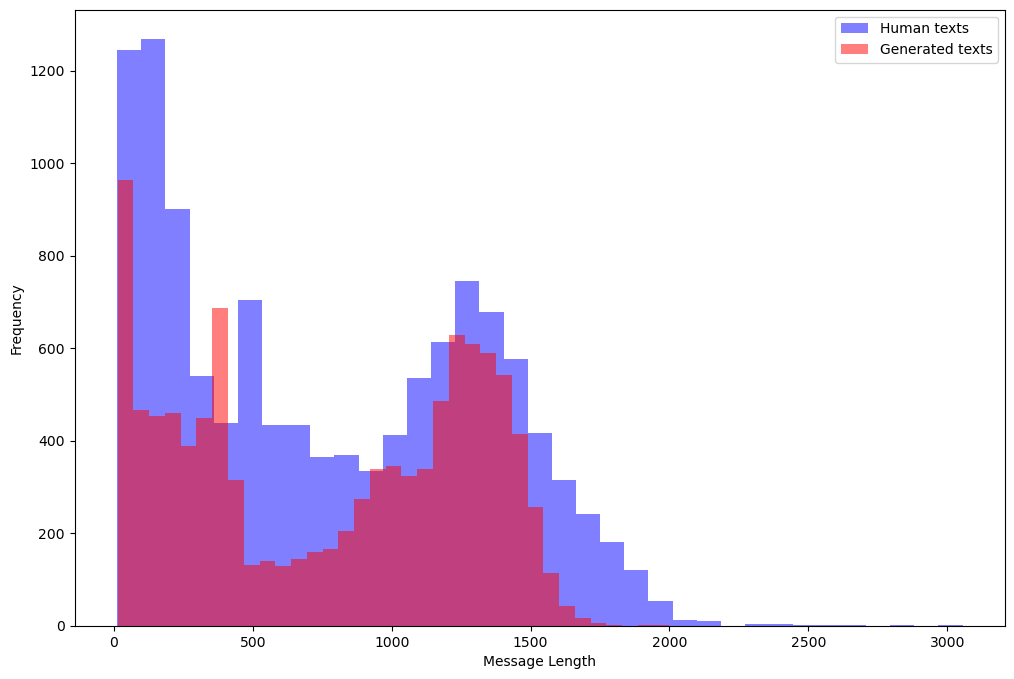

In [50]:
plt.figure(figsize=(12, 8))

train_en_preprocessed[train_en_preprocessed.label == 0].text_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Human texts', alpha=0.5)
train_en_preprocessed[train_en_preprocessed.label == 1].text_len.plot(bins=35, kind='hist', color='red', 
                                       label='Generated texts', alpha=0.5)
plt.legend()
plt.xlabel("Message Length")

In [51]:
def plot_common_words(ham_words, type):
    common_words = [word[0] for word in ham_words.most_common(20)]
    word_counts = [word[1] for word in ham_words.most_common(20)]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(common_words, word_counts, color='skyblue')
    plt.title(f'Top 20 Most Common Words in {type} Labeled Data')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [52]:
words = train_en_preprocessed[train_en_preprocessed.label == 0]['clean_text'].apply(lambda x: [word.lower() for word in x.split()])
ham_words_human = Counter()

for msg in words:
    ham_words_human.update(msg)
    
print(ham_words_human.most_common(50))

[('si', 4335), ('años', 3550), ('dos', 3179), ('ser', 2869), ('dijo', 2859), ('hotel', 2561), ('vez', 2468), ('después', 2344), ('bien', 2279), ('mundo', 2264), ('final', 2219), ('así', 2078), ('parte', 2069), ('siempre', 1866), ('tiempo', 1831), ('año', 1794), ('tan', 1768), ('sido', 1752), ('solo', 1729), ('ahora', 1701), ('mejor', 1696), ('personas', 1694), ('país', 1680), ('quizás', 1679), ('puede', 1672), ('vida', 1672), ('primera', 1667), ('día', 1635), ('lugar', 1622), ('según', 1622), ('gran', 1621), ('servicio', 1600), ('mismo', 1561), ('cada', 1548), ('casa', 1544), ('mientras', 1534), ('unidos', 1517), ('aunque', 1511), ('hacer', 1448), ('interese', 1447), ('excelente', 1439), ('hace', 1422), ('ciudad', 1419), ('hacia', 1369), ('momento', 1364), ('tres', 1354), ('familia', 1353), ('comida', 1323), ('menos', 1280), ('gobierno', 1277)]


In [53]:
words = train_en_preprocessed[train_en_preprocessed.label == 1]['clean_text'].apply(lambda x: [word.lower() for word in x.split()])
ham_words_computer = Counter()

for msg in words:
    ham_words_computer.update(msg)
    
print(ham_words_computer.most_common(50))

[('ser', 3791), ('sido', 3770), ('hotel', 3287), ('mundo', 2930), ('embargo', 2879), ('vida', 2871), ('ciudad', 2863), ('además', 2691), ('si', 2671), ('puede', 2547), ('siempre', 2480), ('años', 2452), ('momento', 2399), ('gran', 2369), ('mientras', 2357), ('cada', 2310), ('lugar', 2239), ('vez', 2136), ('personal', 2112), ('solo', 2107), ('the', 2086), ('historia', 2034), ('país', 2013), ('después', 1964), ('parte', 1955), ('aunque', 1911), ('día', 1834), ('dijo', 1824), ('pesar', 1787), ('tiempo', 1786), ('personas', 1765), ('habitación', 1703), ('importante', 1688), ('dos', 1673), ('podía', 1654), ('así', 1593), ('ahora', 1479), ('gobierno', 1450), ('hombre', 1443), ('unidos', 1425), ('cuenta', 1424), ('cómo', 1414), ('encuentra', 1402), ('hacia', 1397), ('hacer', 1351), ('pueden', 1336), ('amable', 1315), ('tan', 1309), ('casa', 1290), ('trabajo', 1272)]


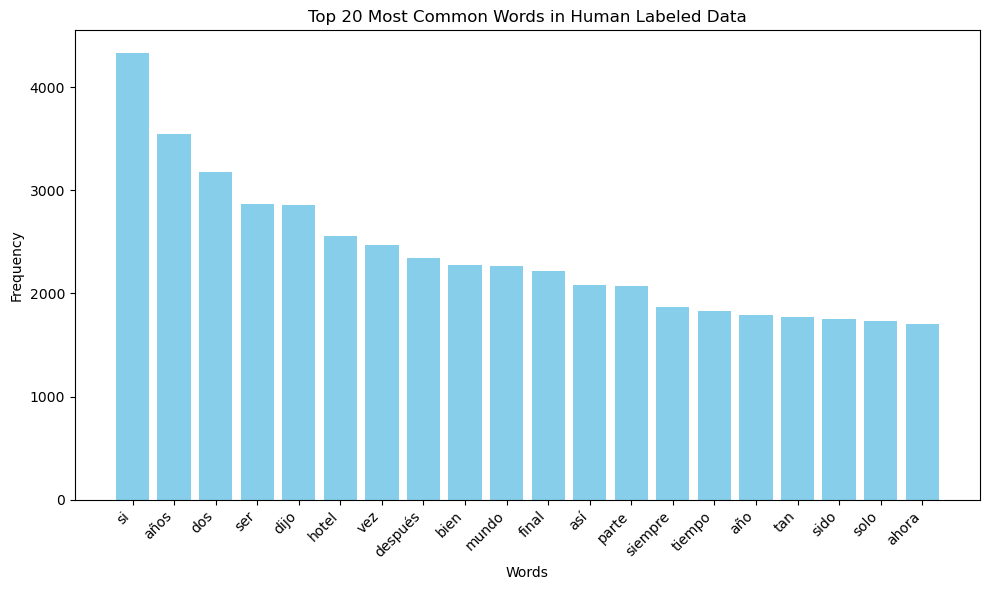

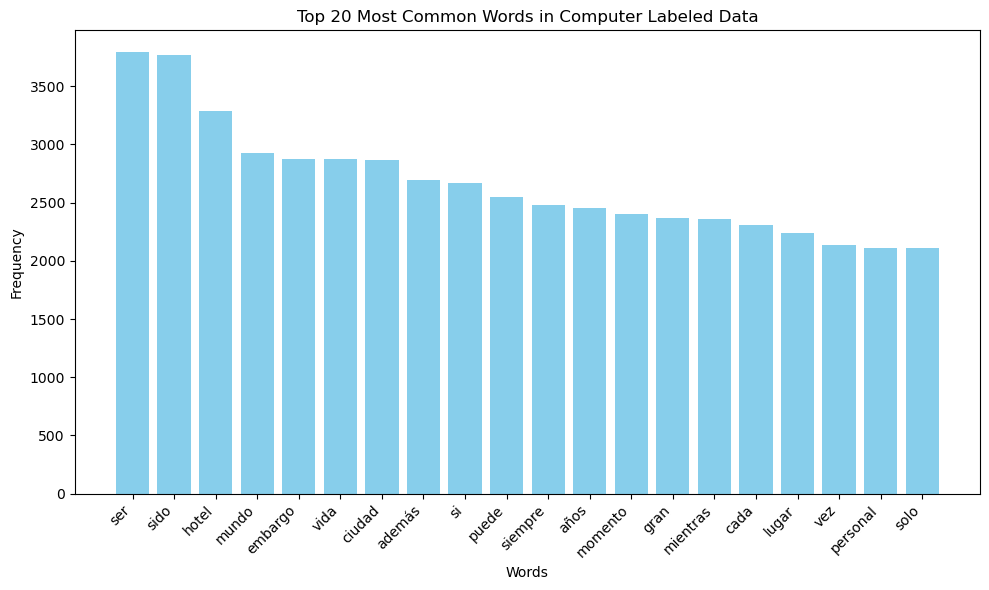

In [54]:
for counter in [(ham_words_human, 'Human'), (ham_words_computer, 'Computer')]:
    plot_common_words(counter[0], counter[1])

In [55]:
print(f"Average Human text length: {train_en_preprocessed[train_en_preprocessed.label == 0]['text_len'].mean()}")
print(f"Average Computer text length: {train_en_preprocessed[train_en_preprocessed.label == 1]['text_len'].mean()}")

Average Human text length: 778.26
Average Computer text length: 779.752668871044


In [56]:
# train_en_preprocessed.loc[:, train_en_preprocessed.columns != 'label'
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(train_en_preprocessed.loc[:, 'clean_text'], 
                                                                train_en_preprocessed['label'], test_size=0.20, random_state=42)

print(X_train_en.shape)
print(X_test_en.shape)
print(y_train_en.shape)
print(y_test_en.shape)

(18028,)
(4507,)
(18028,)
(4507,)


In [57]:
X_train_en

58459                 ¡basta malos olores blísteres jamón ¿
94089     hotel profundamente decepcionante momento entr...
49834     «pandilla perdedores esforzándose conseguir ma...
41187     conde abrió ojos punto soltar cuchara pie junt...
104302    Hace tiempo visité hotel deberías tener cuenta...
                                ...                        
57958     Matt así llamaba aparentaba treinta tantos año...
104977    presidente enrique peña nieto anunció primeras...
25892     Soldados estadounidenses calle ciudad panamá o...
4035      mejor servicio cliente cualquier hotel debe br...
76555     Ruddy g montán envió imagen trabajador tierra ...
Name: clean_text, Length: 18028, dtype: object

In [58]:
y_train_en

58459     1
94089     1
49834     0
41187     0
104302    1
         ..
57958     0
104977    0
25892     0
4035      1
76555     0
Name: label, Length: 18028, dtype: int64

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train_en)

# learn training data vocabulary, then use it to create a document-term matrix
X_train1_dtm = vect.transform(X_train_en)

# equivalently: combine fit and transform into a single step
X_train1_dtm = vect.fit_transform(X_train_en)


# examine the document-term matrix
print(type(X_train1_dtm), X_train1_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test1_dtm = vect.transform(X_test_en)
print(type(X_test1_dtm), X_test1_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (18028, 122074)
<class 'scipy.sparse._csr.csr_matrix'> (4507, 122074)


In [60]:
# from sklearn.feature_extraction.text import TfidfTransformer

# tfidf_transformer = TfidfTransformer()
# tfidf_transformer.fit(X_train1_dtm)
# tfidf_transformer.transform(X_train1_dtm)

In [89]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [90]:
# train the model using X_train1_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train1_dtm, y_train_en)

CPU times: total: 0 ns
Wall time: 14.1 ms


MultinomialNB()

In [115]:
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

# instantiate the grid
grid = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train1_dtm, y_train_en)

# view the complete results
print(grid.cv_results_)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

# use the best parameters to fit the model
logreg_best = LogisticRegression(C=grid.best_params_['C'], penalty=grid.best_params_['penalty'])
logreg_best.fit(X_train1_dtm, y_train_en)

# make class predictions for X_test_dtm
y_test_en_pred_best = logreg_best.predict(X_test1_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test_en, y_test_en_pred_best))

# print the confusion matrix
print("=======Confusion Matrix===========")
print(metrics.confusion_matrix(y_test_en, y_test_en_pred_best))

# calculate F1-score
print(f"F1-score for Logistic Regression model: {f1_score(y_test_en, y_test_en_pred_best, average='macro')}")






C:\Users\34717\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\34717\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'mean_fit_time': array([0.00466642, 0.61536329, 0.00523958, 0.88535876, 0.00555162,
       1.36727884, 0.00499554, 2.10918829, 0.00767753, 2.14942605,
       0.00570922, 2.14423592, 0.00510142, 2.10980017]), 'std_fit_time': array([0.00087342, 0.16241905, 0.00082483, 0.12179805, 0.0006502 ,
       0.15001556, 0.00087552, 0.15789842, 0.00126148, 0.20524728,
       0.00096515, 0.17585751, 0.00083122, 0.13442319]), 'mean_score_time': array([0.        , 0.00180373, 0.        , 0.00200117, 0.        ,
       0.00200231, 0.        , 0.0017211 , 0.        , 0.00195234,
       0.        , 0.00220203, 0.        , 0.00210152]), 'std_score_time': array([0.00000000e+00, 4.59022037e-04, 0.00000000e+00, 4.47294494e-04,
       0.00000000e+00, 2.81909177e-06, 0.00000000e+00, 3.94276154e-04,
       0.00000000e+00, 5.68327665e-04, 0.00000000e+00, 3.20709982e-04,
       0.00000000e+00, 2.99194670e-04]), 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                 

In [111]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_test_en_pred_mb = nb.predict(X_test1_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test_en, y_test_en_pred_mb)) #y_test_en_pred_mb

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test_en, y_test_en_pred_mb)

# Logistic Regression --> 0.8974927889948968
# Naive Bayes --> 0.8757488351453295

=======Accuracy Score===========


ValueError: Found input variables with inconsistent numbers of samples: [4507, 10]

In [ ]:
from sklearn.metrics import f1_score
print(f"F1-score for Naive Bayes model: {f1_score(y_test_en, y_test_en_pred_mb, average='macro')}")

# Naive Bayes --> 0.8743293535703345
# Logistic Regression --> 0.8970396438862069
# XGBoost --> 0.8845952496106236

In [65]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

# train the model using X_train_dtm
%time logreg.fit(X_train1_dtm, y_train_en)

CPU times: total: 10 s
Wall time: 1.36 s


LogisticRegression(solver='liblinear')

In [66]:
# make class predictions for X_test_dtm
y_test_en_pred_lr = logreg.predict(X_test1_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_test_en_prob_lr = logreg.predict_proba(X_test1_dtm)[:, 1]
y_test_en_prob_lr

array([8.53896928e-02, 8.38910156e-02, 1.25068818e-07, ...,
       9.94098293e-01, 1.83331405e-06, 1.53371570e-03])

In [67]:
# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test_en, y_test_en_pred_lr))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test_en, y_test_en_pred_lr))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test_en, y_test_en_pred_lr))

=======Accuracy Score===========
0.8974927889948968
=======Confision Matrix===========
[[2172  238]
 [ 224 1873]]
=======ROC AUC Score===========
0.8972127738302298


In [68]:
from sklearn.metrics import f1_score
print(f"F1-score for Logistic Regression model: {f1_score(y_test_en, y_test_en_pred_lr, average='macro')}")

F1-score for Logistic Regression model: 0.8970396438862069
